# GRIP:- The Spark Foundation

# Data Science & Business Analytics Intern

# Name:- Abhijit Malode

# Task1:- Prediction using Supervised ML

In [2]:
# Import the required library
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

# Reading the data 

In [4]:
data=pd.read_csv(r"C:\Users\ABHIJEET\Desktop\main data\jobthan\DATA  Scientist\student_scores.csv")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Data Exploration 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
data.shape

(25, 2)

In [13]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


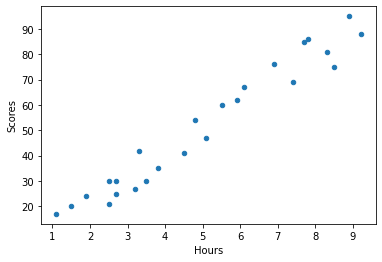

In [14]:
data.plot(kind='scatter',x='Hours',y='Scores')
plt.show()

In [15]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


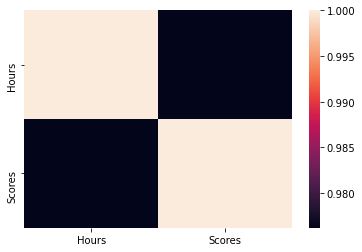

In [17]:
cor_data =data.corr()
sns.heatmap(data=cor_data)

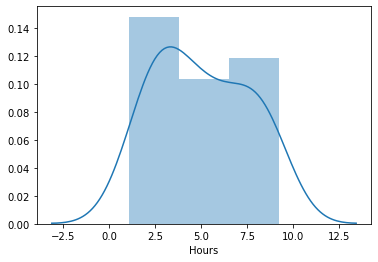

In [19]:
sns.distplot(data["Hours"])

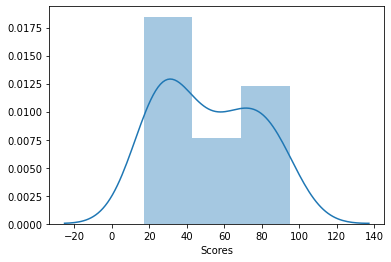

In [20]:
sns.distplot(data["Scores"])

# Model Evaluation

In [29]:
x=data[["Hours"]]
y=data[["Scores"]]

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=50)

# Train the data

In [34]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(x_train, y_train) 

LinearRegression()

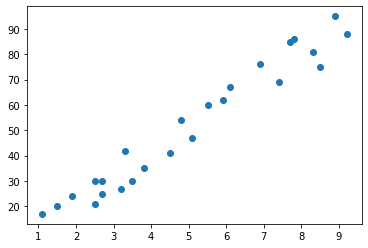

In [35]:
plt.scatter(x,y)
plt.show();

In [38]:
y_predct=reg.predict(x_test)


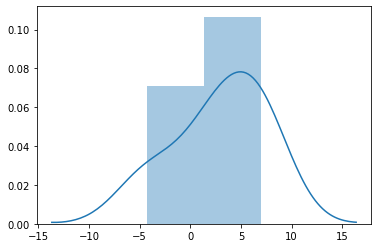

In [42]:
sns.distplot(np.array(y_test-y_predct))

In [45]:
from sklearn import metrics  
from sklearn.metrics import r2_score
print('MAE:', metrics.mean_absolute_error(y_test, y_predct)) 
print('MSE:',metrics.mean_squared_error(y_test,y_predct))
print('RMAE:',np.sqrt(metrics.mean_squared_error(y_test,y_predct)))
print("R2 score:",r2_score(y_test, y_predct))

MAE: 4.5916495300630285
MSE: 25.584078296539932
RMAE: 5.058070610078504
R2 score: 0.971014141329942


In [47]:
import statsmodels.api as sm
x_train=sm.add_constant(x_train)
x_test=sm.add_constant(x_test)
model=sm.OLS(y_train,x_train)
results=model.fit()
results.params
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     305.8
Date:                Sun, 09 May 2021   Prob (F-statistic):           9.64e-13
Time:                        18:51:09   Log-Likelihood:                -62.514
No. Observations:                  20   AIC:                             129.0
Df Residuals:                      18   BIC:                             131.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8102      3.083      0.912      0.3